In [84]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [85]:
img = cv2.imread('aux_cam.jpg')

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

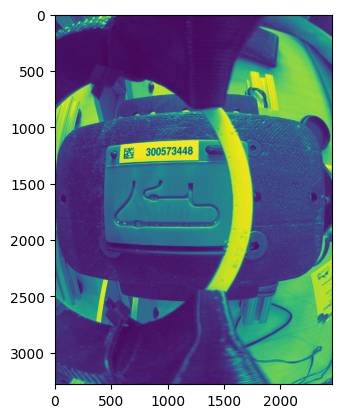

In [86]:
rot = cv2.rotate(img_gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(rot)

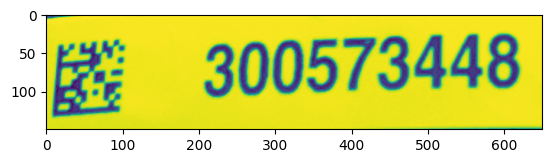

In [99]:
crop = rot[1150:1300, 600:1250]
plt.imshow(crop)

157.0


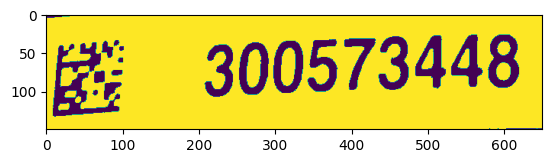

In [100]:
ret, thresh = cv2.threshold(crop, 146, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret)
plt.imshow(thresh)

In [101]:
import pytesseract

tess_config = '--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789'
output = pytesseract.image_to_boxes(
        thresh, lang='osd', config=tess_config)
boxes = output.strip().split('\n') if output.strip() else []
h, w = thresh.shape

['2', '0', '16', '97', '150', '0']
['3', '208', '42', '245', '110', '0']
['0', '253', '45', '292', '113', '0']
['0', '298', '47', '337', '115', '0']
['5', '343', '49', '382', '117', '0']
['7', '391', '51', '432', '118', '0']
['3', '436', '51', '475', '121', '0']
['4', '484', '53', '524', '122', '0']
['4', '531', '55', '572', '123', '0']
['8', '579', '54', '620', '123', '0']
[12998, 2516, 2652, 2652, 2652, 2747, 2730, 2760, 2788, 2829]
10259.5
222.5
86.5
86.5
86.5
8.5
8.5
21.5
49.5
90.5
300573448


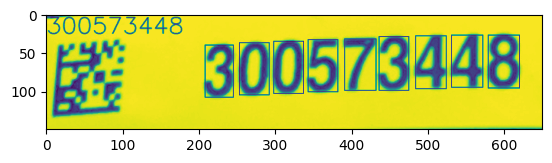

In [103]:
out = crop.copy()
bs = []
areas = []
for b in boxes:
    b = b.split(' ')
    print(b)

    x1, y1 = int(b[1]), int(b[2])
    x2, y2 = int(b[3]), int(b[4])
    a = abs(x2 - x1) * abs(y2 - y1)

    bs.append(b)
    areas.append(a)

sd = np.std(areas)
med = np.median(areas)
print(areas)

output = ""
for b, a in zip(bs, areas):
    print(abs(a - med))
    if abs(a - med) < sd:
        output += b[0]

        out = cv2.rectangle(out,
                            (int(b[1]), h - int(b[2])),
                            (int(b[3]), h - int(b[4])),
                            (0, 255, 0), 1)

out = cv2.putText(out, output, (0, 25), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 0), 1, cv2.LINE_AA)

print(output)
plt.imshow(out)